# Simple linear regression

Simple linear regression attempts to answer the question: *Is the variable $X$ related to the variable $Y$? If so, what is the relationship and can we use it to predict $Y$?* Here the variable $X$ is called the *predictor* or *explanatory* or *independent variable* or *covariate*.
The variable $Y$ is called the *response* or *dependent variable*.

## The Linear Model

Simple Linear regression, also called *ordinary least squares* (OLS), is a good modeling tool for data where there is a *linear* relationship between an independent variable, $X$, and a dependent variable $Y$.
We can check for a linear relationship by plotting the variables in a scatterplot and trying to determine whether the points fall on and around a line (the same thing when looking for correlation between the variables).
Statistical modeling involves proposing a theoretical relationship between variables and using data to estimate the unknown components, called **parameters**, of the model.
The theoretical model used in simple linear regression is 

$$Y=\beta_0 + \beta_1 X +\epsilon,$$ 

where $\beta_0$ is the intercept of the line (where it intersects the y-axis) and $\beta_1$ is the slope of the line (how quickly it rises or falls).
The term $\epsilon$ is an error term assumed to be from a normal distribution with mean zero and (unknown) variance, $\sigma^2$.
Note that $\beta_0, \beta_1$ and $\epsilon$ are the unknown parameters in this model.
The slope and intercept are the parameters in the model that must be estimated from the data.

The term ordinary least squares regression gets its name from the way that the intercept and slope are estimated.
Figure 1 shows a scatterplot of engine displacement versus highway miles per gallon.
The best fit regression line is the line drawn in black.
This line is found so that the sum of the squared distances from the points to the line is minimized, hence the term *least squares*.
One such distance from a point to the line is shown in red in Figure 1.

<!-- ![](scatterplot){width="8cm"} -->
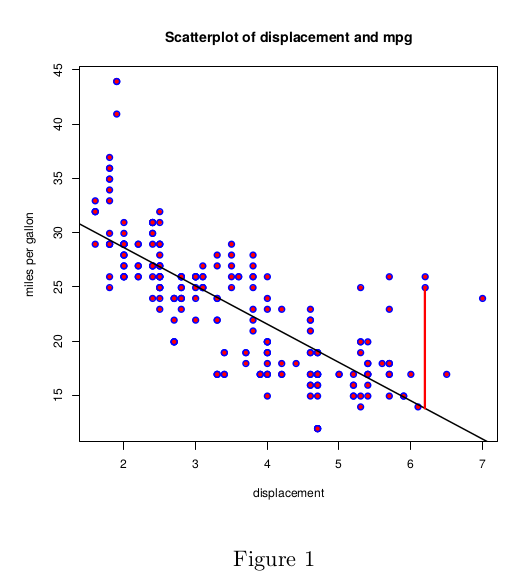

Once we find the best fit regression line, we can find the *predicted* response values.
If the estimate of the intercept is $b_0$ and the estimate of the slope is $b_1$, the predicted response at each predictor variable, $X$ is found as 

$$\hat{Y} = b_0 + b_1 X.$$ 

It is not recommended to predict the response for $X$ values outside of the range that was used to find the best fit line.
The relationship between $Y$ and $X$ is only valid for the observed range of $X$ values.
So, for example, if the values of $X$ used to fit the line are between 0 and 100, it would not make sense to predict $Y$ for values less than 0 or greater than 100.

Since the estimates, $b_0$ and $b_1$, are calculated from the data, they are statistics and can be used to test whether there is a significant relationship between $X$ and $Y$.
This type of test is called a Wald test and tests whether the true coefficient $\beta_1$ is equal to zero or not.
If $\beta_1=0$, the theoretical model becomes $Y=\beta_0 + \epsilon$ and there is no relationship between $X$ and $Y$.
The results of the Wald test will give a *p-value*.
The p-value is a probability that measures how likely you are to get the estimate that you got (or something more extreme) if the true parameter $\beta_1$ is really zero.
The p-value is always between 0 and 1.
For large p-values, it is more likely that $\beta_1$ is equal to zero.
For small p-values, it is more likely that $\beta_1$ is not zero.
So small p-values (typically less than 0.05) indicate that there is a strong linear relationship between $X$ and $Y$.

It is worth stressing that simple linear regression is very similar to a concept you already know, the equation for a line:

$$y = mx + b$$

There are two trivial differences and one important difference.
The two trivial differences are that $m$ is the same as $\beta_1$ ($\beta_1$ is the slope) and $b$ is the same as $\beta_0$ ($\beta_0$ is the intercept).
The important differences is that simple linear regression **discovers** both $\beta$s from the data using OLS.

Unlike KNN regression, which only uses the $K$ closest datapoints to predict $\hat{Y}$, simple linear regression uses *all* the datapoints to estimate the intercept $\beta_0$ and the slope $\beta_1$.
Therefore we can describe simple linear regression as simpler than KNN regression (because it has fewer parameters; remember KNN regression has as many parameters as datapoints) and also more opinionated than KNN regression since linear regression assumes the data follows a line.


## Example: Cricket Chirps

Let's look at the relationship between how often crickets chirp and the current temperature.
Do you think it is a linear relationship?
Let's find out!

- `import pandas as pd`

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="importAs" id="ji{aK+A5l`eBa?Q1/|Pf" x="128" y="319"><field name="libraryName">pandas</field><field name="libraryAlias" id="Vd-20qkN(WN5nJAUj;?4">pd</field></block></xml>

Load the dataframe:
    
- Create variable `dataframe`
- Set it to `with pd do read_csv using "datasets/crickets.csv"`
- `dataframe` (to display)

In [2]:
dataframe = pd.read_csv('datasets/crickets.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable><variable id="Vd-20qkN(WN5nJAUj;?4">pd</variable></variables><block type="variables_set" id="9aUm-oG6/!Z54ivA^qkm" x="2" y="351"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="VALUE"><block type="varDoMethod" id="g.yE$oK%3]$!k91|6U|I"><field name="VAR" id="Vd-20qkN(WN5nJAUj;?4">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id="fBBU[Z}QCipaz#y=F$!p"><field name="TEXT">datasets/crickets.csv</field></block></value></block></value></block><block type="variables_get" id="pVVu/utZDzpFy(h9Q-+Z" x="6" y="425"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></xml>

,chirps,temp
0,44.000,80.50
1,46.400,78.50
2,43.600,78.00
3,35.000,73.50
4,35.000,70.50
5,32.600,68.00
6,28.900,66.00
7,27.700,65.00
8,25.500,61.50
9,20.375,57.00


To get a feel for this data, let's get some descriptive statistics and also plot the relationship between `temp` and `chirps`.

- `with dataframe do describe using`

In [3]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="?LJ($9e@x-B.Y,`==|to" x="8" y="188"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,chirps,temp
count,55.000000,55.000000
mean,28.805182,65.713636
std,8.865180,8.065188
min,12.500000,49.250000
25%,22.375000,60.500000
50%,29.500000,66.500000
75%,35.000000,71.500000
max,46.400000,80.500000


Look at each of the values in the descriptive statistics table.
Do any of them look unreasonable to you?
Here are the things you should look for:

- Does the mean value seem reasonable given what we know?
    - is 28 chirps per minute (1 every 2 seconds) reasonable for a cricket?
    - is 65 degrees F a reasonable average temperature?
- Do the min/max values seem reasonable given what we know?
    - Is 12.50/46.40 a reasonable min/max for cricket chirps?
    - Is 49.25/80.50 a reasonable min/max for degrees F?
    
In this case, all the values seem to make sense.
If we had seen temperatures below 0 or above 100, we might have taken a second look to make sure the data wasn't corrupted or that we misunderstood what the values are (e.g. degrees C instead of degress C; chirps per second vs. chirps per minute).

Let's plot the relationship between `temp` and `chirps`.

First, the imports:

- `import plotly.express as px`

In [4]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable></variables><block type="importAs" id="kPF|afHe60B:rsCmJI2O" x="128" y="178"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="k#w4n=KvP~*sLy*OW|Jl">px</field></block></xml>

Create the scatterplot:

- Create variable `fig`
- Set it to `with px do scatter using` a list containing
    - `dataframe`
    - freestyle `x="temp"`
    - freestyle `y="chirps"`

In [7]:
fig = px.scatter(dataframe, x="temp", y="chirps")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w|!1_/S4wRKF4S1`6Xg+">fig</variable><variable id="k#w4n=KvP~*sLy*OW|Jl">px</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="variables_set" id="/1x?=CLW;i70@$T5LPN/" x="48" y="337"><field name="VAR" id="w|!1_/S4wRKF4S1`6Xg+">fig</field><value name="VALUE"><block type="varDoMethod" id="O07?sQIdula@ap]/9Ogq"><field name="VAR" id="k#w4n=KvP~*sLy*OW|Jl">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="INPUT"><block type="lists_create_with" id="~tHtb;Nbw/OP6#7pB9wX"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="UE)!btph,4mdjsf[F37|"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~L)yq!Jze#v9R[^p;2{O"><field name="CODE">x="temp"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="yu5^$n1zXY3)#RcRx:~;"><field name="CODE">y="chirps"</field></block></value></block></value></block></value></block></xml>

And show the figure:

- `with fig do show using`

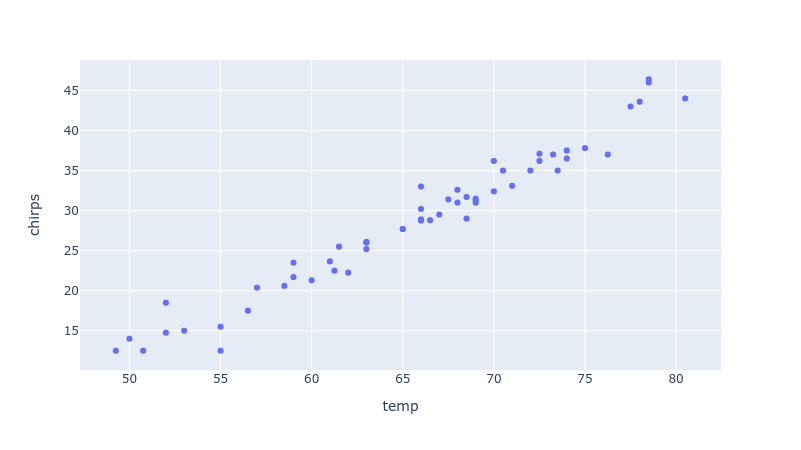

In [8]:
fig.show()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="w|!1_/S4wRKF4S1`6Xg+">fig</variable></variables><block type="varDoMethod" id="SV]QMDs*p(4s=2tPrl4a" x="8" y="188"><field name="VAR" id="w|!1_/S4wRKF4S1`6Xg+">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></xml>

Wow - that's a pretty good line, right?
Let's fit a simple linear regression model and see what kind of fit it has.

First, the imports:

- `import sklearn as sklearn`
- `import numpy as np`

In [17]:
import sklearn.linear_model as linear_model
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable><variable id="YynR+H75hTgW`vKfMxOx">np</variable></variables><block type="importAs" id="m;0Uju49an!8G3YKn4cP" x="93" y="288"><field name="libraryName">sklearn.linear_model</field><field name="libraryAlias" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><next><block type="importAs" id="^iL#`T{6G3.Uxfj*r`Cv"><field name="libraryName">numpy</field><field name="libraryAlias" id="YynR+H75hTgW`vKfMxOx">np</field></block></next></block></xml>

Create the model:

- Create variable `lm` (for linear model)
- Set it to `with sklearn create LinearRegression using`

In [13]:
lm = linear_model.LinearRegression()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</variable></variables><block type="variables_set" id="!H`J#y,K:4I.h#,HPeK{" x="127" y="346"><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><value name="VALUE"><block type="varCreateObject" id="h:O3ZfE(*c[Hz3sF=$Mm"><field name="VAR" id="!+Hi;Yx;ZB!EQYU8ItpO">linear_model</field><field name="MEMBER">LinearRegression</field><data>linear_model:LinearRegression</data></block></value></block></xml>

Train the model (also known as fitting the model).
In this case, we will use all the data instead of a split:

- `with lm do fit using` a list containing
    - `dataframe ["temp"]` (this is your X; use {dictVariable} from LISTS)
    - `dataframe ["chirps"]` (this is your Y)

In [14]:
lm.fit(dataframe['temp'], dataframe['chirps'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="F]q147x/*m|PMfPQU-lZ">lm</variable><variable id="B5p-Xul6IZ.0%nd96oa%">dataframe</variable></variables><block type="varDoMethod" id="W6(0}aPsJ;vA9C3A!:G@" x="8" y="188"><field name="VAR" id="F]q147x/*m|PMfPQU-lZ">lm</field><field name="MEMBER">fit</field><data>lm:</data><value name="INPUT"><block type="lists_create_with" id="|pmNlB*$t`wI~M5-Nu5]"><mutation items="2"></mutation><value name="ADD0"><block type="indexer" id=".|%fa!U;=I@;!6$?B7Id"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="{*5MFGJL4(x-JLsuD9qv"><field name="TEXT">temp</field></block></value></block></value><value name="ADD1"><block type="indexer" id="o.R`*;zvaP%^K2/_t`6*"><field name="VAR" id="B5p-Xul6IZ.0%nd96oa%">dataframe</field><value name="INDEX"><block type="text" id="w0w/T-Wh/df/waYll,rv"><field name="TEXT">chirps</field></block></value></block></value></block></value></block></xml>

ValueError: Expected 2D array, got 1D array instead:
array=[80.5  78.5  78.   73.5  70.5  68.   66.   65.   61.5  57.   55.   76.25
 74.   74.   72.5  66.   77.5  78.5  68.5  68.5  68.   66.   59.   70.
 69.   67.   61.25 58.5  72.   71.   69.   66.5  60.   75.   73.25 72.5
 70.   67.5  66.   69.   63.   63.   61.   62.   56.5  55.   52.   53.
 50.   52.   65.   63.   59.   50.75 49.25].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
dataframe['temp']

0     80.50
1     78.50
2     78.00
3     73.50
4     70.50
5     68.00
6     66.00
7     65.00
8     61.50
9     57.00
10    55.00
11    76.25
12    74.00
13    74.00
14    72.50
15    66.00
16    77.50
17    78.50
18    68.50
19    68.50
20    68.00
21    66.00
22    59.00
23    70.00
24    69.00
25    67.00
26    61.25
27    58.50
28    72.00
29    71.00
30    69.00
31    66.50
32    60.00
33    75.00
34    73.25
35    72.50
36    70.00
37    67.50
38    66.00
39    69.00
40    63.00
41    63.00
42    61.00
43    62.00
44    56.50
45    55.00
46    52.00
47    53.00
48    50.00
49    52.00
50    65.00
51    63.00
52    59.00
53    50.75
54    49.25
Name: temp, dtype: float64

## Checking the Model Fit

### Residual Analysis

To check the fit of the model, as in KNN regression, we compute the *residuals* as the difference between the observed responses and the predicted responses.
If the model fits well, the residuals should be small.
We can assess the fit by examining plots of the residuals.
If the linear regression model fits the data well, we should observe no patterns in the plot of $X$ versus the residuals.
Figure 2 below shows a residual plot for a good model fit.
Notice that the residuals seem to be randomly scattered across the plot.
The residuals should be centered around zero (on the y-axis) with nearly as many above zero as below.
Figure 2 exhibits this type of behavior.

<!-- ![](good){width="7cm"} -->
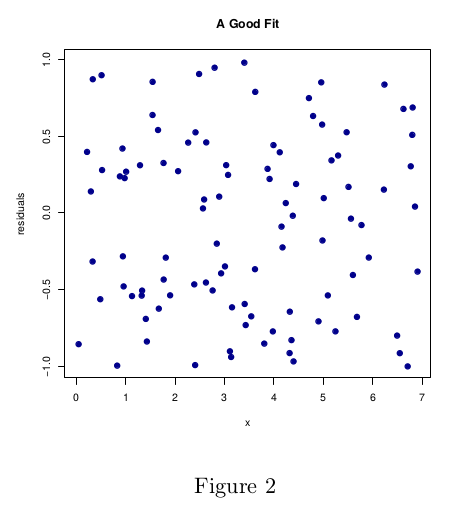

If the residual plot seems to be randomly scattered but not centered around zero, this could indicate the presence of *outliers* in the data.
Recall that outliers are observations that are much different than the main body of the data.
The residual plot shown below (Figure 3) is an example of this situation.
Notice in this plot many of the residuals are centered around zero, most are between -5 and 5.
However, at low values of $X$ (less than 2) and high values of $X$ (between 5 and 7) there are residuals much higher, between 5 and 15.
The plot indicates that the observations that yielded these residuals should be examined more closely.

<!-- ![](outliers){width="8cm"} -->
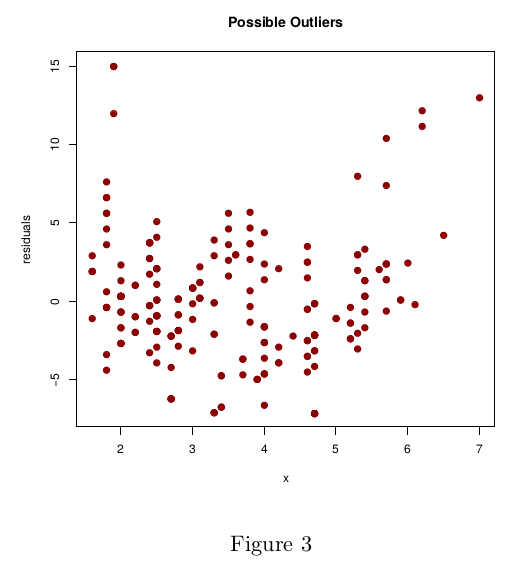

Sometimes the relationship between $X$ and $Y$ is not linear but is polynomial in nature, maybe a quadratic or cubic.
The residuals will reveal whether higher order terms in $X$ are needed to fit the data.
These polynomial models are still considered simple linear regression models since they are linear in terms of the parameters ($\beta_0$, $\beta_1$, $\beta_2$, $\ldots$).
The residual plot shown below in Figure 4, illustrates a case where a quadratic term in $X$ is needed, $X^2$.

<!-- ![](quadratic){width="8cm"} -->
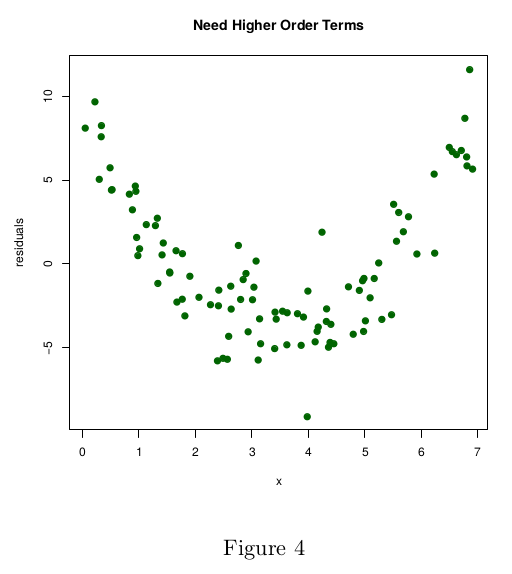

There were two assumptions that we make with the linear model, we assume 1) the $\epsilon$’s are normally distributed and 2) that the variance is the same for all $X$ values (i.e. the variance is constant).
We can use residual plots to check these assumptions as well.
Figure 5 shows a *qqplot* which compares the residuals to a normal distribution.
If the normal assumption is reasonable for the data, the qqplot of the residuals will look like a 45-degree straight line from the lower left corner to the upper right corner.
The plot of these residuals looks like a straight line in the middle sections but veers off at the lower and upper ends.
This could indicate a problem with the normal assumption for this data set.
Fortunately, for data with lots of observations the normal assumption is less crucial and we can typically proceed with plots like Figure 5.
Sometimes a transformation of the observed response variable, $Y$, such as *log* or *square root*, will improve the normality of the data.

<!-- ![](qqnorm){width="8cm"} -->
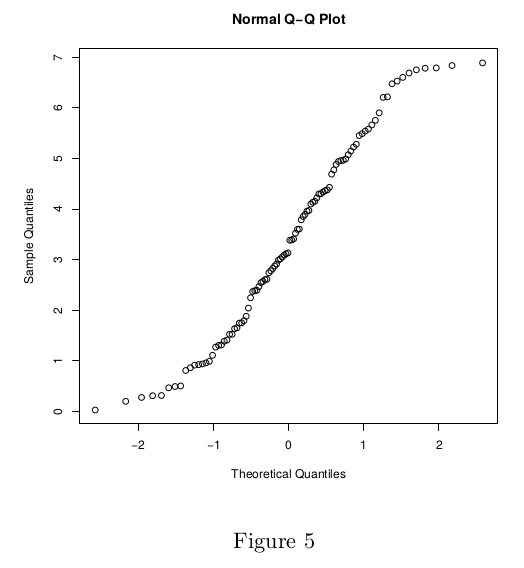

The other assumptions is more crucial for successful modeling.
If the variance is not constant but instead is a function of the response, $Y$, then a plot of the predicted values, $\hat{Y}$, versus the residuals will have a funnel shape like that observed in Figure 6.
The residual plot clearly shows that for small $\hat{Y}$ the variation in residuals is small, funneling out as $\hat{Y}$ increases.
A $\log$ or square root transformation on $Y$ can sometimes fix this problem.
In this case it is called a *variance stabilizing* transformation.

<!-- ![](var){width="8cm"} -->
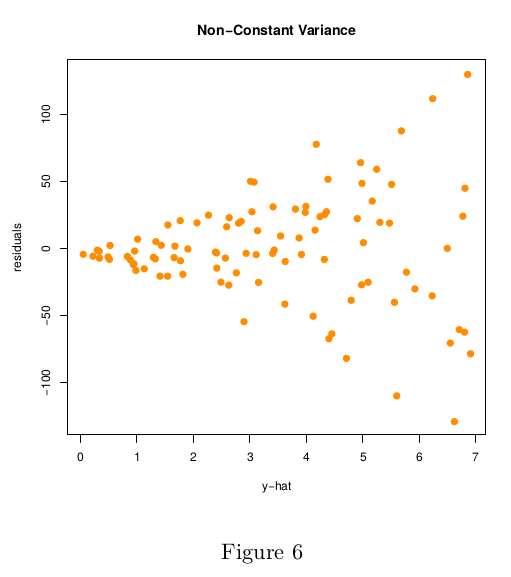

## Coefficient of Determination

 The *coefficient of determination*, $r^2$, is another way to assess the model fit.
It measures the proportion of variation in the data that is due to the regression.
The remaining variation is assumed to be due to random noise from the error term, $\epsilon$.
$r^2$ is always between 0 and 1.
The bigger it is, the better the model fits the data.